=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== MISSING VALUES ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin 

/tmp/ipython-input-2582849777.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


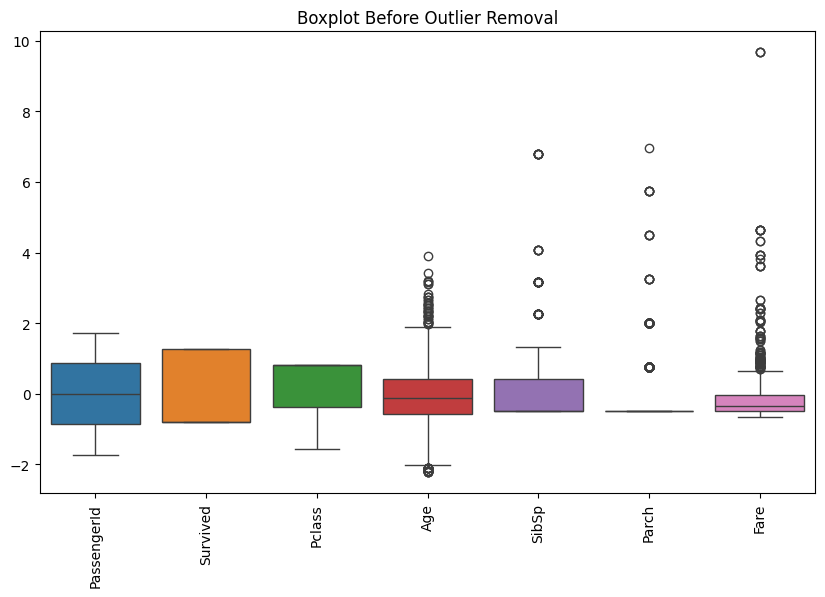

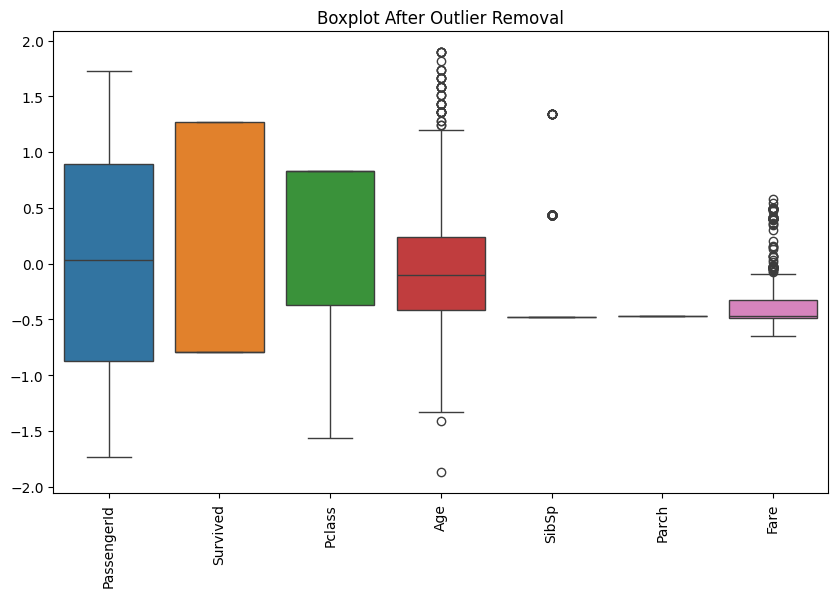


=== CLEANED DATA SAMPLE ===
   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0    -1.730108 -0.789272  0.827377 -0.565736  0.432793 -0.473674 -0.502445   
2    -1.722332  1.266990  0.827377 -0.258337 -0.474545 -0.473674 -0.488854   
3    -1.718444  1.266990 -1.566107  0.433312  0.432793 -0.473674  0.420730   
4    -1.714556 -0.789272  0.827377  0.433312 -0.474545 -0.473674 -0.486337   
5    -1.710669 -0.789272  0.827377 -0.104637 -0.474545 -0.473674 -0.478116   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   
5                             False                                  False   

   Name_Abelson, Mr. Samuel  ... 

In [2]:
# -----------------------------------------------
# Objective: Learn how to clean and prepare raw data for ML
# Tools: Python, Pandas, NumPy, Matplotlib, Seaborn
# Dataset: Titanic-Dataset.csv
# -----------------------------------------------

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# -----------------------------------------------
# Step 2: Import dataset and explore basic info
# -----------------------------------------------
df = pd.read_csv("Titanic-Dataset.csv")

print("=== BASIC INFO ===")
print(df.info())
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())
print("\n=== DATA TYPES ===")
print(df.dtypes)

# -----------------------------------------------
# Step 3: Handle missing values
# -----------------------------------------------
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n=== Missing values after cleaning ===")
print(df.isnull().sum())

# -----------------------------------------------
# Step 4: Convert categorical features to numerical
# -----------------------------------------------
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nCategorical columns successfully encoded!")

# -----------------------------------------------
# Step 5: Normalize/Standardize numerical features
# -----------------------------------------------
scaler = StandardScaler()
numeric_features = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print("\nNumerical features standardized!")

# -----------------------------------------------
# Step 6: Visualize outliers using boxplots
# -----------------------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded[numeric_features])
plt.title("Boxplot Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()

# -----------------------------------------------
# Step 7: Remove outliers using IQR (for numeric cols only)
# -----------------------------------------------
Q1 = df_encoded[numeric_features].quantile(0.25)
Q3 = df_encoded[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within the IQR bounds
df_cleaned = df_encoded[
    ~((df_encoded[numeric_features] < (Q1 - 1.5 * IQR)) |
      (df_encoded[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
]

# -----------------------------------------------
# Step 8: Visualize after removing outliers
# -----------------------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[numeric_features])
plt.title("Boxplot After Outlier Removal")
plt.xticks(rotation=90)
plt.show()

# -----------------------------------------------
# Step 9: Final check
# -----------------------------------------------
print("\n=== CLEANED DATA SAMPLE ===")
print(df_cleaned.head())

print(f"\nFinal cleaned dataset shape: {df_cleaned.shape}")
